In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\1903\.venv\lib\site-packages\tensorflow\python\framework\dtypes.py:461: FutureWarning: Passing (type, 1) or '1type' as a synonym of type

In [ ]:
tf.nn.conv2d()

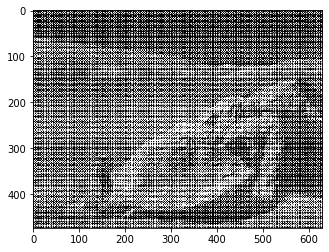

In [3]:
moon = plt.imread('../data/moonlanding.png')
plt.imshow(moon, cmap='gray')

In [4]:
moon.shape

(474, 630)

In [6]:
# 使用均值滤波
input = tf.constant(value=moon.reshape(1, 474, 630, 1), dtype=tf.float32)
filter = tf.constant(value=np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]).reshape(3,3,1,1), dtype=tf.float32)
moon_conv2d = tf.nn.conv2d(input=input, filter=filter, strides=[1,1,1,1], padding='SAME')

<class 'numpy.ndarray'>
(1, 474, 630, 1)


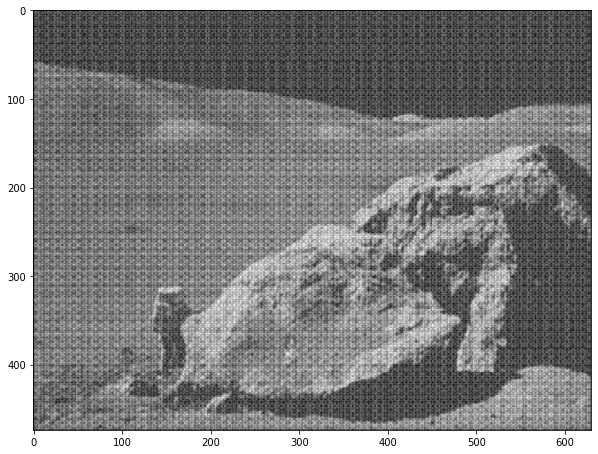

In [10]:
with tf.Session() as sess:
    result = sess.run(moon_conv2d)
    print(type(result))
    print(result.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(result.reshape(474, 630), cmap='gray')

<class 'numpy.ndarray'>
(1, 474, 630, 1)


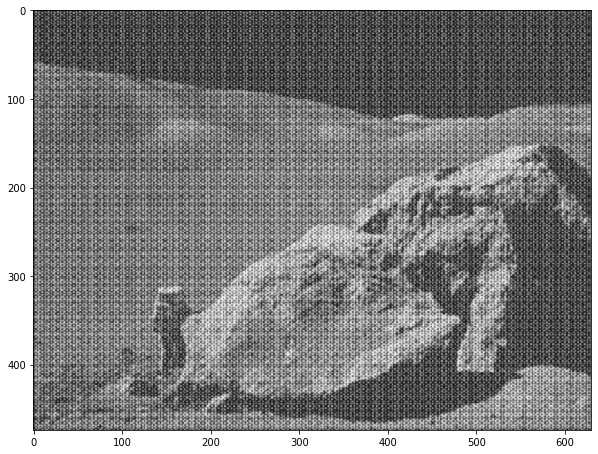

In [11]:
# 高斯滤波
input = tf.constant(value=moon.reshape(1, 474, 630, 1), dtype=tf.float32)
filter = tf.constant(value=np.array([[1/16, 2/16,  1/16],  [2/16, 4/16, 2/16], [1/16, 2/16,  1/16]]).reshape(3,3,1,1), dtype=tf.float32)
moon_conv2d = tf.nn.conv2d(input=input, filter=filter, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    result = sess.run(moon_conv2d)
    print(type(result))
    print(result.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(result.reshape(474, 630), cmap='gray')

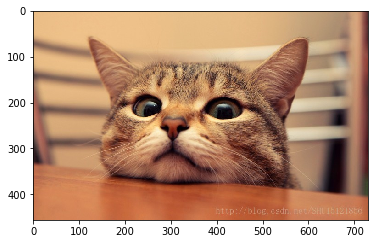

In [12]:
# 使用卷积实现各种滤镜效果.
cat = plt.imread('../data/cat.jpg')
plt.imshow(cat)

In [14]:
cat = cat.mean(axis=2)

In [15]:
cat.shape

(456, 730)

<class 'numpy.ndarray'>
(1, 456, 730, 1)


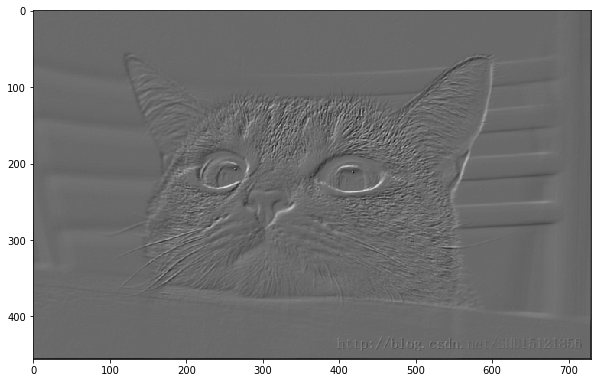

In [17]:
# 浮雕
input = tf.constant(value=cat.reshape(1, 456, 730, 1), dtype=tf.float32)
filter = tf.constant(value=np.array([[-1,-1,0],[-1,0,1],[0,1,1]]).reshape(3,3,1,1), dtype=tf.float32)
moon_conv2d = tf.nn.conv2d(input=input, filter=filter, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    result = sess.run(moon_conv2d)
    print(type(result))
    print(result.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(result.reshape(456, 730), cmap='gray')

<class 'numpy.ndarray'>
(1, 456, 730, 1)


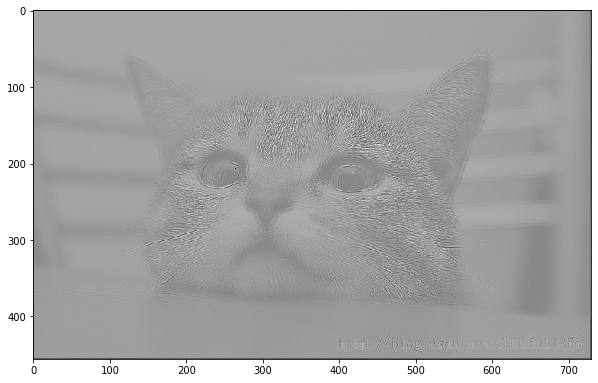

In [18]:
input = tf.constant(value=cat.reshape(1, 456, 730, 1), dtype=tf.float32)
filter = tf.constant(value=np.array([[1,1,1],[1,-7,1],[1,1,1]]).reshape(3,3,1,1), dtype=tf.float32)
moon_conv2d = tf.nn.conv2d(input=input, filter=filter, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    result = sess.run(moon_conv2d)
    print(type(result))
    print(result.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(result.reshape(456, 730), cmap='gray')

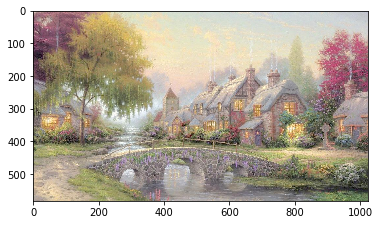

In [19]:
# 对彩色图片进行卷积
euro = plt.imread('../data/欧式.jpg')
plt.imshow(euro)

In [20]:
euro.shape

(582, 1024, 3)

<class 'numpy.ndarray'>
(3, 582, 1024, 1)


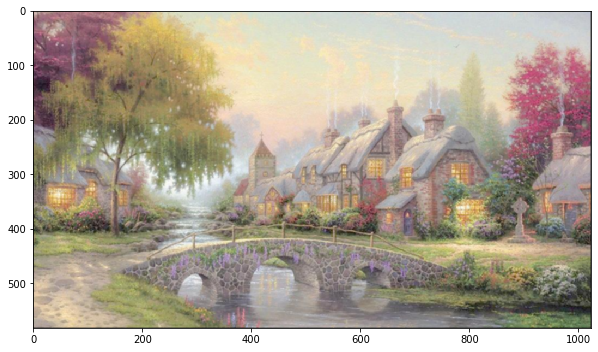

In [25]:
# 要把彩色图片当成3 张图片
# 注意不要让reshape打乱了数据
input = tf.constant(value=euro.reshape(1, 582, 1024, 3).transpose([3, 1,2,0]), dtype=tf.float32)
filter = tf.constant(value=np.array([[1/9, 1/9, 1/9], [1/9, 1/9, 1/9], [1/9, 1/9, 1/9]]).reshape(3,3,1,1), dtype=tf.float32)
moon_conv2d = tf.nn.conv2d(input=input, filter=filter, strides=[1,1,1,1], padding='SAME')
with tf.Session() as sess:
    result = sess.run(moon_conv2d)
    print(type(result))
    print(result.shape)
    plt.figure(figsize=(10,8))
    plt.imshow(result.reshape(3, 582, 1024).transpose([1,2,0]) / 255, cmap='gray')

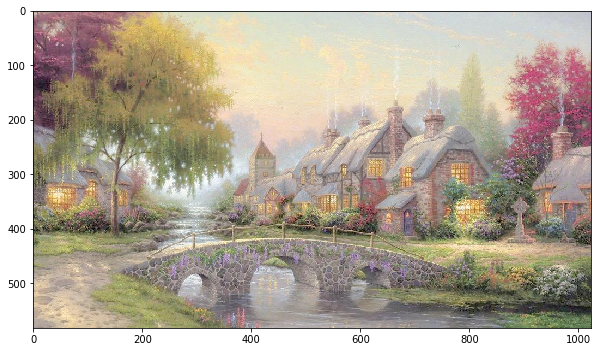

In [26]:
plt.figure(figsize=(10,8))
plt.imshow(euro)